# Customer **Segmentation**

## 0. Import **Libraries**

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
%matplotlib inline


## 1. Load **Data**

In [13]:
df = pd.read_csv('Online Retail.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 2. **Exploratory** Analysis

In [14]:
# profile = ProfileReport(df, title="Online Retail Store")
# profile.to_notebook_iframe()

## 3. Data **Clean**-Up

In [15]:
# import klib
# df= klib.data_cleaning(df)

#### **-** Negative Product Quantity

In [16]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [17]:
df.shape

(541909, 8)

In [18]:
df = df.loc[df['Quantity'] > 0]

In [19]:
df.shape

(531285, 8)

#### - Missing CustomerID

In [20]:
pd.isnull(df['CustomerID']).sum()

133361

In [21]:
df.shape

(531285, 8)

In [22]:
df = df[pd.notnull(df['CustomerID'])]

In [23]:
df.shape

(397924, 8)

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month

In [25]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 1/10/2011 10:32 ~ 9/9/2011 9:52


In [26]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(199198, 8)

In [27]:
df.shape

(397924, 8)

In [28]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [29]:
df.shape

(198726, 8)

#### - Total Sales

In [30]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


#### - Per Customer Data

In [32]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

In [33]:
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,2706.32,4,676.580000
12348.0,1120.24,2,560.120000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,608.23,2,304.115000
12356.0,2329.97,2,1164.985000
12357.0,6207.67,1,6207.670000
12358.0,683.20,1,683.200000


In [34]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,3251.000000,3251.000000,3251.000000
mean,1325.323051,2.691480,460.049771
std,5502.867998,4.111281,3272.165559
min,0.000000,1.000000,0.000000
25%,252.730000,1.000000,179.008750
50%,490.520000,2.000000,290.810000
75%,1069.370000,3.000000,432.055000
max,168469.600000,114.000000,168469.600000


In [35]:
rank_df = customer_df.rank(method='first')

In [36]:
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,3248.0,1.0,3250.0
12347.0,3005.0,2601.0,2909.0
12348.0,2475.0,1531.0,2763.0
12349.0,2797.0,2.0,3200.0
12350.0,1152.0,3.0,1969.0
12352.0,1861.0,1532.0,1719.0
12356.0,2943.0,1533.0,3140.0
12357.0,3174.0,4.0,3248.0
12358.0,2000.0,5.0,2920.0


In [37]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,3251.000000,3251.000000,3251.000000
mean,1626.000000,1626.000000,1626.000000
std,938.627189,938.627189,938.627189
min,1.000000,1.000000,1.000000
25%,813.500000,813.500000,813.500000
50%,1626.000000,1626.000000,1626.000000
75%,2438.500000,2438.500000,2438.500000
max,3251.000000,3251.000000,3251.000000


In [38]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [39]:
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.728056,-1.731252,1.730186
12347.0,1.469167,1.038751,1.366890
12348.0,0.904512,-0.101212,1.211344
12349.0,1.247567,-1.730186,1.676917
12350.0,-0.504993,-1.729121,0.365427
12352.0,0.250366,-0.100146,0.099081
12356.0,1.403113,-0.099081,1.612994
12357.0,1.649217,-1.728056,1.728056
12358.0,0.398454,-1.726990,1.378609


In [40]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,3.251000e+03,3.251000e+03,3.251000e+03
mean,-4.412206e-17,-1.570909e-18,1.140617e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731252e+00,-1.731252e+00,-1.731252e+00
25%,-8.656259e-01,-8.656259e-01,-8.656259e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.656259e-01,8.656259e-01,8.656259e-01
max,1.731252e+00,1.731252e+00,1.731252e+00


# 3. Customer Segmentation via K-Means Clustering

In [41]:
from sklearn.cluster import KMeans

#### - K-Means Clustering

In [42]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [43]:
kmeans

KMeans(n_clusters=4)

In [44]:
kmeans.labels_

array([3, 1, 1, ..., 0, 2, 1])

In [45]:
kmeans.cluster_centers_

array([[-1.24319027, -0.72449628, -1.043315  ],
       [ 1.20035782,  0.95063915,  0.93133307],
       [ 0.22754477,  0.7699398 , -0.57855638],
       [-0.04345874, -0.93680013,  0.81681774]])

In [46]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [47]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.728056,-1.731252,1.730186,3
12347.0,1.469167,1.038751,1.366890,1
12348.0,0.904512,-0.101212,1.211344,1
12349.0,1.247567,-1.730186,1.676917,3
12350.0,-0.504993,-1.729121,0.365427,3


In [48]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    909
1    824
2    760
3    758
Name: TotalSales, dtype: int64

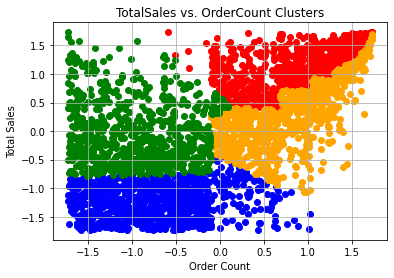

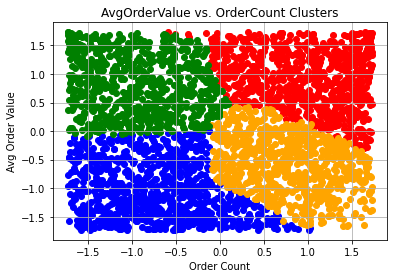

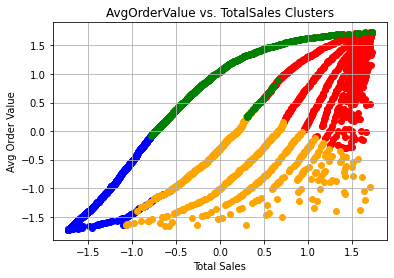

In [49]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

#### - Selecting the best number of clusters

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4213
Silhouette Score for 5 Clusters: 0.3815
Silhouette Score for 6 Clusters: 0.3662
Silhouette Score for 7 Clusters: 0.3865
Silhouette Score for 8 Clusters: 0.3646


#### - Interpreting Customer Segments

In [52]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

In [53]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [54]:
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.728056,-1.731252,1.730186,2
12347.0,1.469167,1.038751,1.366890,3
12348.0,0.904512,-0.101212,1.211344,3
12349.0,1.247567,-1.730186,1.676917,2
12350.0,-0.504993,-1.729121,0.365427,2
12352.0,0.250366,-0.100146,0.099081,0
12356.0,1.403113,-0.099081,1.612994,3
12357.0,1.649217,-1.728056,1.728056,2
12358.0,0.398454,-1.726990,1.378609,2


In [55]:
kmeans.cluster_centers_

array([[ 0.23098544,  0.77259389, -0.57699047],
       [-1.24238492, -0.72361466, -1.04324325],
       [-0.04345874, -0.93680013,  0.81681774],
       [ 1.20044116,  0.94946838,  0.93404165]])

In [56]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.728056,-1.731252,1.730186,2
12349.0,1.247567,-1.730186,1.676917,2
12350.0,-0.504993,-1.729121,0.365427,2
12357.0,1.649217,-1.728056,1.728056,2
12358.0,0.398454,-1.726990,1.378609,2


In [57]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,758.000000,758.000000,758.000000
mean,668.747955,1.039578,654.525363
std,2816.231393,0.195094,2816.827580
min,278.100000,1.000000,278.100000
25%,338.552500,1.000000,335.830000
50%,430.490000,1.000000,415.335000
75%,647.905000,1.000000,592.812500
max,77183.600000,2.000000,77183.600000


In [58]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,104
WHITE HANGING HEART T-LIGHT HOLDER,96
POSTAGE,89
PAPER CHAIN KIT 50'S CHRISTMAS,88
SET OF 3 CAKE TINS PANTRY DESIGN,83


In [59]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,467
REGENCY CAKESTAND 3 TIER,440
PAPER CHAIN KIT 50'S CHRISTMAS,418
JUMBO BAG RED RETROSPOT,410
RABBIT NIGHT LIGHT,343
